# From an online PDF file to a wordcloud

Before starting any automatic analysis of a PDF, it is essential to understand what type of content the file contains. Not all PDFs are the same: some include real text (in digital **PostScript format**), while others are simply scanned images without internal textual information.

This distinction is important because it determines the method to use for extracting the content:

* If the PDF contains digital text, libraries such as `PyMuPDF` or `pdfplumber` can read it directly. Extraction is fast, accurate, and requires no additional steps.

* If the PDF is made up of images, the text is not actually “text,” but just an image. In this case, you must first apply an OCR step (Optical Character Recognition), for example with Tesseract, to convert the images into analyzable text.

A very simple way to perform this check is to manually open the PDF and try to select the text with the mouse: if you can highlight it, then it is digital text; otherwise, you are most likely dealing with an image-based PDF.

## Analysis of a PDF with Digital PostScript

### Modules and Libraries

For this lesson we will use *Othello* by *William Shakespeare* from [The Folger Shakespeare Library](https://www.folger.edu/explore/shakespeares-works/othello/).

In this case we do not need OCR as we have verified that the text in the document is already selectable: this means that the PDF contains digital text and not simple images.

To extract text from the PDF, we will use the `PyMuPDF` library, a specialized tool for working with PDF documents, specifically the `fitz` module. PyMuPDF works very well with PDFs that already have embedded text, whereas for scanned PDFs or those in which Python cannot read the text, this method cannot be used and we must rely on text recognition (OCR), a more complex and error-prone technique. For this reason, whenever possible, it is preferable to use PyMuPDF directly on PDFs containing embedded text.

We therefore start by installing PyMuPDF (`!pip install PyMuPDF`), and then we import the relevant library (`import fitz`):

In [13]:
!pip install PyMuPDF


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import fitz  # PyMuPDF module

In [15]:
import urllib.request
from pathlib import Path

# Step 1: Create a ./data folder if it doesn’t exist
data_folder = Path("./data/")
data_folder.mkdir(exist_ok=True)

# Step 2: Load the text file (in this case we upload the text directly form the Folger Shakespeare library website)
text_address = "https://folger-main-site-assets.s3.amazonaws.com/uploads/2022/11/othello_PDF_FolgerShakespeare.pdf"
text_name = './data/' + text_address.rsplit('/', 1)[-1]
urllib.request.urlretrieve(text_address, text_name)

('./data/othello_PDF_FolgerShakespeare.pdf',
 <http.client.HTTPMessage at 0x1e6f80172f0>)

In the following step, we are telling Python which PDF file should be analyzed by specifying its location (through the file path). Immediately afterward, we use the PyMuPDF library to open it and make it ready to be “read”:

* Using the pathlib library, we create a file object by specifying its path: `pdf_path = Path(text_name)`;
* Using the PyMuPDF library, we open the document, making it ready to be “read”: `doc = fitz.open(pdf_path)`;

In [16]:
from pathlib import Path

pdf_path = Path(text_name)  # creating a file object

doc = fitz.open(pdf_path) # open the PDF

In the following steps, all the text in the PDF is read page by page through an iteration. In this way, the text extracted from each page is appended to the variable full_text, which, at the end of the iterations (when there are no more pages to read), will contain the entire text of the document in a single variable.

In [17]:
full_text = "" #creating an empty variable

for i, page in enumerate(doc): #for every page of the document:
    text = page.get_text()  #text extraction
    if text:  #if the page is not empty
        full_text += text + "\n"  #append the page to the full_text (adding a new line)

It is possible to check whether the text has been imported correctly into the variable using the following step, where you choose a page to display directly in the notebook. This check is not strictly necessary, but it can be useful for identifying any obvious errors in the text import.

In [18]:
# 4. Controllo rapido:
pagina_num = 19
page = doc[pagina_num - 1]
text_pag19 = page.get_text()
print(f"Pagina {pagina_num}:\n{text_pag19}")

Pagina 19:
29
Othello
ACT 1. SC. 3
DUKE
FIRST SENATOR
DUKE
SECOND SENATOR
DUKE
SAILOR
OFFICER
DUKE
SAILOR
He exits.
DUKE
FIRST SENATOR
Enter Duke, Senators, and Officers.
, reading a paper
 
 There’s no composition in these  news
 That gives them credit.
, reading a paper
 
 Indeed, they are disproportioned.
 My letters say a hundred and seven galleys.
 
 And mine, a hundred forty.
, reading a paper
 
 And mine, two hundred.
 But though they jump not on a just account
 (As in these cases, where the aim reports
 ’Tis oft with difference), yet do they all confirm
 A Turkish fleet, and bearing up to Cyprus.
 
 Nay, it is possible enough to judgment.
 I do not so secure me in the error,
 But the main article I do approve
 In fearful sense.
, within   
 What ho, what ho, what ho!
Enter Sailor.
  A messenger from the galleys.
  Now, what’s the business?
 
 The Turkish preparation makes for Rhodes.
 So was I bid report here to the state
 By Signior Angelo. 
 
 How say you by this change?
  
 

## Word Clouds

Once the PDF is opened, we can begin exploring different possibilities for textual analysis. The following steps illustrate, as examples, some of the techniques that can be applied to extract information and visualize the contents of the document.

To quickly analyze the main themes present in a text, it is possible to use a word cloud. A word cloud is a graphical representation of the terms contained in a text, where the size of each word is proportional to its frequency. In other words, the words that appear most often in the text stand out visually, allowing you to quickly identify key concepts, recurring themes, and terms of interest.

To obtain a meaningful word cloud, it is first necessary to perform tokenization, that is, to split the text into smaller units called tokens, usually individual words (unigrams). This step allows us to work with each word as a separate element. After this division, the occurrences of each word are counted to determine which terms are most frequent in the text.

In [38]:
tokenized_full_text = full_text.split() #splitting text on whitespace

unigrams_full_text = [] #inizializing the unigram list

for token in tokenized_full_text: 
    token = token.lower() #uniforming text by making lowercase

    for char in ['.', '!', '?', ',', ';', ':', '—', '-', '"', '“', '”', "'", '(', ')', '[', ']', '…']: 
        token = token.replace(char, '') #replacing punctuation with whitespace

    if token:  #eliminating empty tokens such as ''
        unigrams_full_text.append(token)

from collections import Counter
unigrams_count = Counter(unigrams_full_text)
print(unigrams_count.most_common(50))

[('ftln', 3683), ('and', 824), ('i', 817), ('the', 772), ('to', 641), ('of', 485), ('you', 482), ('a', 461), ('othello', 459), ('my', 430), ('that', 382), ('iago', 371), ('in', 360), ('not', 321), ('is', 316), ('it', 314), ('me', 275), ('he', 260), ('cassio', 251), ('for', 249), ('with', 232), ('this', 227), ('desdemona', 227), ('her', 225), ('be', 224), ('but', 224), ('do', 220), ('your', 213), ('have', 211), ('what', 180), ('him', 178), ('his', 175), ('as', 175), ('she', 164), ('so', 161), ('will', 154), ('thou', 143), ('act', 141), ('if', 141), ('o', 138), ('emilia', 136), ('on', 122), ('by', 121), ('sc', 121), ('are', 112), ('roderigo', 112), ('now', 105), ('no', 101), ('all', 98), ('shall', 97)]


As we can see from the initial results, we may want to clean the text by removing words that are not particularly informative for our analysis. These words, called **stop words**, are very common terms in a language, such as conjunctions, prepositions, or articles (for example, “and”, “the”, “of” in English), which appear frequently but do not carry meaningful information for understanding the main content of the text.

In the simplest approach, it is possible to create a **list** or **set** of stop words to remove from the unigrams already extracted. By filtering out these words, we obtain a more “interesting” set of terms, useful for subsequent analyses such as counting the most frequent words or creating a word cloud that highlights the key concepts present in the text.

This approach not only makes the results more readable and meaningful but also reduces noise in the dataset, allowing us to focus on the words that truly contribute to the content analysis.

However, it should be noted that the definition of stop words depends greatly on the type of analysis being carried out. For example, if one wished to study the use of pronouns in a text, terms like he, she, or they should not be considered stop words, because they are precisely the elements of interest in that kind of research.

In [33]:
# Load the NLTK stopwords list
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#Adding customized stop words
stage_words = ['ftln', 'sc', 'act', 'scene', 'enter', 'exit', 'exits'] #eliminating matadata used in theatre plays (not actual content)
numbers = [str(i) for i in range(1, 100)] # removes numbers like '1', '2', '3'… (page numbers and such)
stop_words.extend(stage_words)
stop_words.extend(numbers)

We use a list comprehension to filter the tokens, keeping only those that are not included in the list (or set) of stop words.

In [40]:
unigrams_cleaned = [token for token in unigrams_full_text if token not in stop_words]

from collections import Counter
unigrams_count_cleaned = Counter(unigrams_cleaned)
print(unigrams_count_cleaned.most_common(100))

[('othello', 459), ('iago', 371), ('cassio', 251), ('desdemona', 227), ('thou', 143), ('emilia', 136), ('roderigo', 112), ('shall', 97), ('’t', 92), ('lord', 91), ('good', 89), ('’tis', 88), ('would', 81), ('well', 81), ('thy', 80), ('come', 78), ('love', 78), ('thee', 76), ('let', 73), ('know', 71), ('say', 68), ('hath', 67), ('yet', 67), ('think', 64), ('go', 63), ('may', 59), ('make', 57), ('moor', 57), ('must', 57), ('heaven', 56), ('one', 53), ('upon', 53), ('i’ll', 53), ('speak', 50), ('see', 48), ('sir', 48), ('brabantio', 47), ('man', 46), ('give', 46), ('lodovico', 45), ('honest', 42), ('th’', 41), ('never', 39), ('montano', 37), ('even', 36), ('wife', 36), ('look', 36), ('put', 35), ('us', 34), ('duke', 34), ('much', 34), ('ay', 33), ('soul', 32), ('general', 31), ('cannot', 31), ('time', 30), ('thus', 30), ('indeed', 30), ('like', 29), ('lieutenant', 29), ('cyprus', 29), ('take', 29), ('night', 29), ('dost', 29), ('hand', 29), ('handkerchief', 28), ('world', 27), ('away', 27

Based on the cleaned results, we can now create a **word cloud** (a graphical representation of the most frequent words). In practice, the words extracted from the text are arranged in a “cloud,” and the size of each word is proportional to the number of times it appears.

In [35]:
# For making wordclouds
from wordcloud import WordCloud
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import urllib

In [36]:
### Download cloud image for our word cloud shape ###
# It is not required to have a shape to create a word cloud
download_url = 'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/sample_cloud.png'
urllib.request.urlretrieve(download_url, 'data/sample_cloud.png')
print('Cloud shape downloaded to data folder.')

Cloud shape downloaded to data folder.


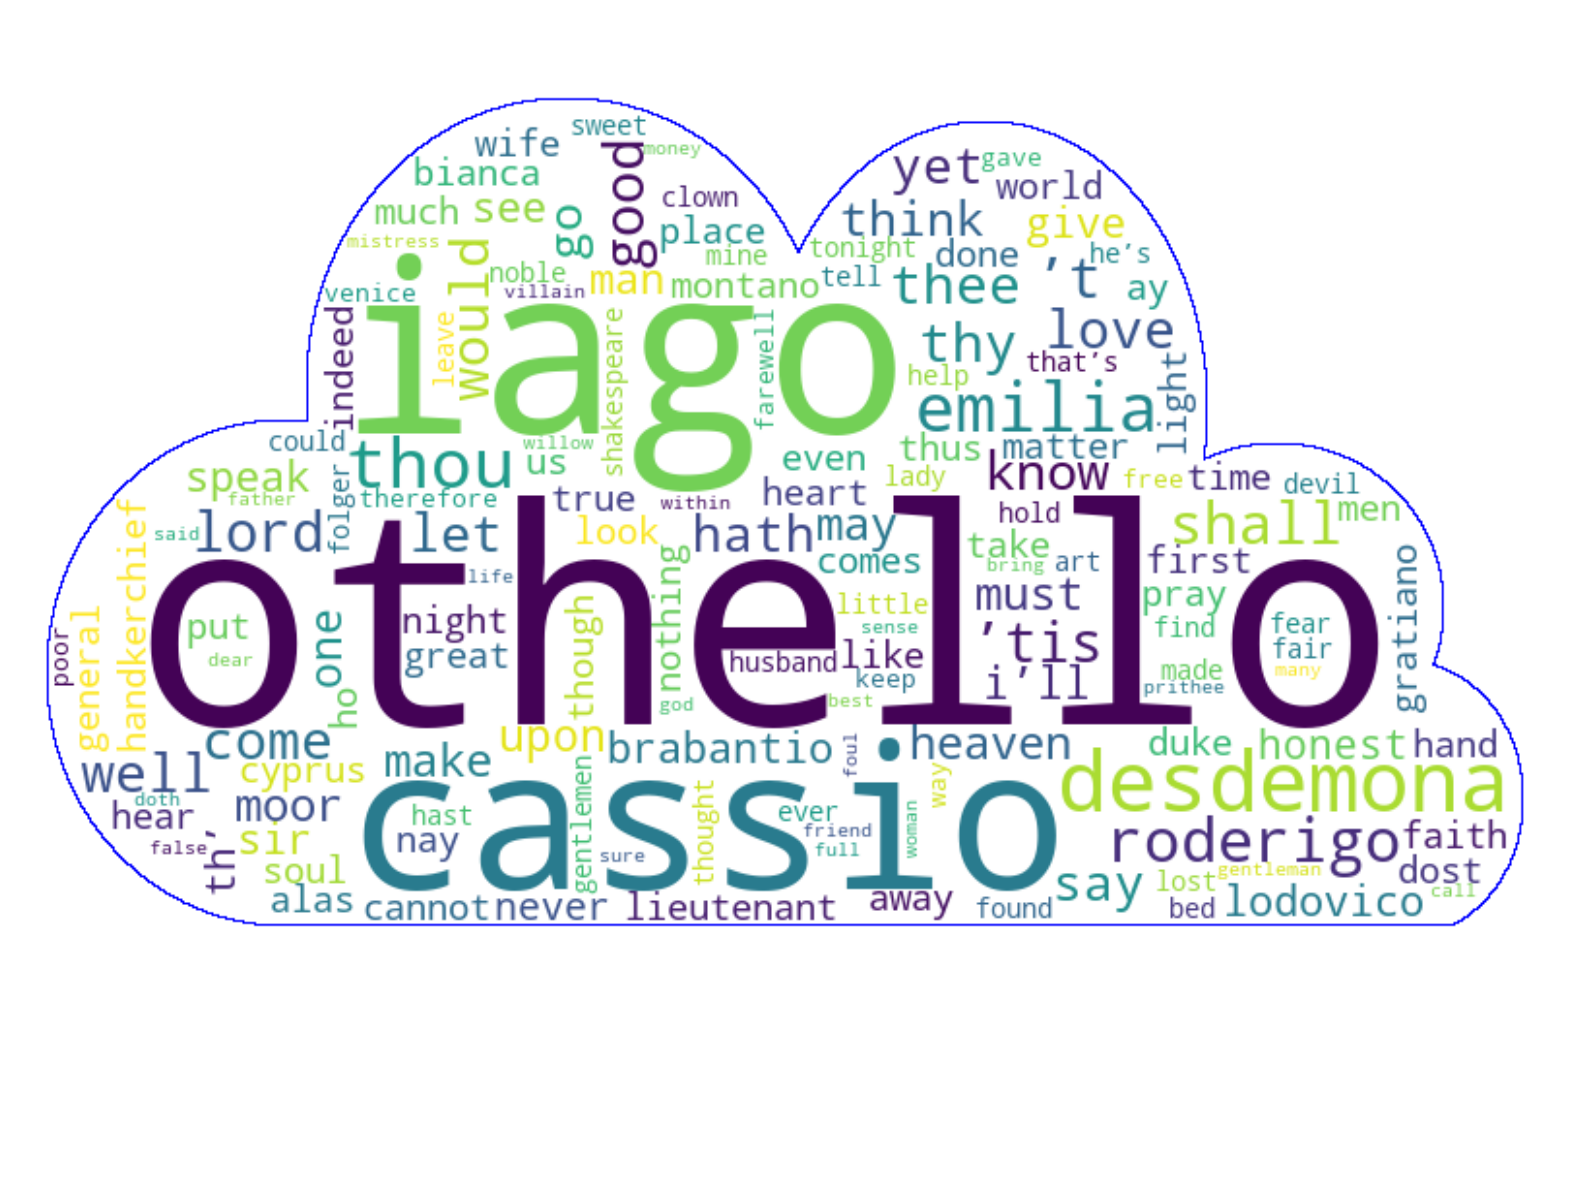

In [39]:
# Create a wordcloud from our data

# Adding a mask shape of a cloud to your word cloud
# By default, the shape will be a rectangle
# You can specify any shape you like based on an image file
cloud_mask = np.array(Image.open('data/sample_cloud.png')) # Specifies the location of the mask shape
cloud_mask = np.where(cloud_mask > 3, 255, cloud_mask) # this line will take all values greater than 3 and make them 255 (white)

### Specify word cloud details
wordcloud = WordCloud(
    width = 800, # Change the pixel width of the image if blurry
    height = 600, # Change the pixel height of the image if blurry
    background_color = "white", # Change the background color
    colormap = 'viridis', # The colors of the words, see https://matplotlib.org/stable/tutorials/colors/colormaps.html
    max_words = 150, # Change the max number of words shown
    min_font_size = 4, # Do not show small text
    
    # Add a shape and outline (known as a mask) to your wordcloud
    contour_color = 'blue', # The outline color of your mask shape
    mask = cloud_mask, # 
    contour_width = 1
).generate_from_frequencies(unigrams_count_cleaned)

mpl.rcParams['figure.figsize'] = (20,20) # Change the image size displayed
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()